<a href="https://colab.research.google.com/github/Nitesh-Projects/ML-Projects/blob/master/ANN_Churning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ANN_Churn_Modelling.csv to ANN_Churn_Modelling.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['ANN_Churn_Modelling.csv']))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df2.shape

(10000, 14)

In [ ]:
df2.isnull().sum(axis = 0)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
x = df2.iloc[:,3:13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y = df2.iloc[:,13]

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
Geography = pd.get_dummies(x['Geography'],drop_first=True)

In [ ]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
x = pd.concat([x,Geography,gender],axis =1)

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
x = x.drop(['Geography','Gender'],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test = sc.fit_transform(x_test)

In [ ]:
x_test


array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [ ]:
import keras

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.layers import LeakyReLU,PReLU,ELU

In [ ]:
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,  kernel_initializer='he_uniform',activation='relu',input_dim = 11   ))



In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1,  kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6096 - accuracy: 0.7470 - val_loss: 0.5491 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7962 - val_loss: 0.5147 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5096 - accuracy: 0.7962 - val_loss: 0.4973 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4925 - accuracy: 0.7962 - val_loss: 0.4847 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4794 - accuracy: 0.7964 - val_loss: 0.4749 - val_accuracy: 0.7959
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7974 - val_loss: 0.4658 - val_accuracy: 0.7970
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4574 - accuracy: 0.8009 - val_loss: 0.4579 - val_accuracy: 0.8008

In [ ]:
#training accuracy = 83.6 and accuracy of model = 83.30

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,  kernel_initializer='uniform',activation='relu',input_dim = 11   ))

In [ ]:
# Adding the input layer and the 2nd hidden layer
classifier.add(Dense(units = 6,  kernel_initializer='uniform',activation='relu' ))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1,  kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6265 - accuracy: 0.7962 - val_loss: 0.5543 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.7962 - val_loss: 0.5072 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5060 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5050 - accuracy: 0.7962 - val_loss: 0.5055 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5044 - accuracy: 0.7962 - val_loss: 0.5049 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5033 - accuracy: 0.7962 - val_loss: 0.5031 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4998 - accuracy: 0.7962 - val_loss: 0.4984 - val_accuracy: 0.7955

In [ ]:
# train accuracy: 0.8606  val_accuracy: 0.8527


In [ ]:
#now trying to add more hidden layers to increase further accuracy 1st hidden layer with 10 nuerons
classifier.add(Dense( units = 10 , kernel_initializer = 'uniform',activation = 'relu',input_dim =11))

In [ ]:
#2st hidden layer with 15 nuerons
classifier.add(Dense( units = 15 , kernel_initializer = 'uniform',activation = 'relu'))

In [ ]:
#3rd hidden layer with 10 nuerons
classifier.add(Dense( units = 10 , kernel_initializer = 'uniform',activation = 'relu'))

In [ ]:
classifier.compile(optimizer='Adamax',loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history2=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 2.2858 - accuracy: 0.7962 - val_loss: 2.1946 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 1.9979 - accuracy: 0.7962 - val_loss: 1.9483 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 1.9231 - accuracy: 0.7962 - val_loss: 1.9145 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 1.8855 - accuracy: 0.7962 - val_loss: 1.8659 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 1.8299 - accuracy: 0.7962 - val_loss: 1.8192 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 1.7979 - accuracy: 0.2030 - val_loss: 1.7992 - val_accuracy: 0.0000e+00
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 1.7779 - accuracy: 0.0000e+00 - val_loss: 1.7868 - val_accuracy

In [ ]:
#trying with implimenting drop out

In [ ]:
#now trying to add more hidden layers to increase further accuracy 1st hidden layer with 10 nuerons
classifier.add(Dense( units = 10 , kernel_initializer = 'uniform',activation = 'relu',input_dim =11))
classifier.add(Dropout(0.30))

In [ ]:
#2st hidden layer with 15 nuerons
classifier.add(Dense( units = 15 , kernel_initializer = 'uniform',activation = 'relu'))
classifier.add(Dropout(0.40))

In [ ]:
#3rd hidden layer with 10 nuerons
classifier.add(Dense( units = 10 , kernel_initializer = 'uniform',activation = 'relu'))
classifier.add(Dropout(0.30))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:


# Fitting the ANN to the Training set
model_history3=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 1.9098 - accuracy: 0.0564 - val_loss: 1.0885 - val_accuracy: 0.0000e+00
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 1.4548 - accuracy: 0.1021 - val_loss: 0.5657 - val_accuracy: 0.0254
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 1.3419 - accuracy: 0.1416 - val_loss: 0.5172 - val_accuracy: 0.0473
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 1.3013 - accuracy: 0.1715 - val_loss: 0.4878 - val_accuracy: 0.2052
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 1.2784 - accuracy: 0.1515 - val_loss: 0.4748 - val_accuracy: 0.1723
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 1.2687 - accuracy: 0.1056 - val_loss: 0.4536 - val_accuracy: 0.0000e+00
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 1.2453 - accuracy: 0.0758 - val_loss: 0.4357 - val_accuracy

In [ ]:
# list all data in history

print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


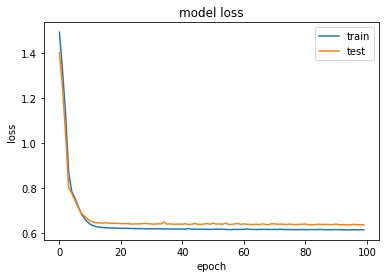

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()